#**Lab 4 : CLUSTERING Part 1**

**PRANAY KAMAL MIRIYALA, 200030033**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn as sm
import random
%matplotlib inline
from sklearn.metrics.cluster import homogeneity_score, silhouette_score
from sklearn.cluster import KMeans

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

Number of Data Points : 400


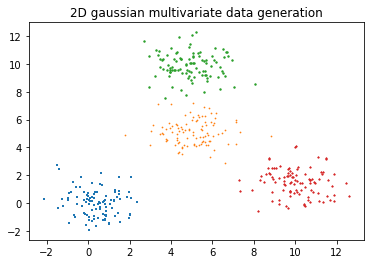

In [2]:
#Generate 2D gaussian data

#fixing random values
np.random.seed(42)

#defining function to generate data
def gaussian_2d(mu1, mu2, sigma):
    x = np.random.normal(mu1, sigma, 100)
    y = np.random.normal(mu2, sigma, 100)
    return (x, y)

#getting data
x1, y1 = gaussian_2d(0.5, 0, 1)
x2, y2 = gaussian_2d(5, 5, 1)
x3, y3 = gaussian_2d(5, 10, 1)
x4, y4 = gaussian_2d(10, 1.5, 1)

#plotting data
plt.title("2D gaussian multivariate data generation")
plt.scatter(x1,y1, marker='+', s=2)
plt.scatter(x2,y2, marker='.', s=2)
plt.scatter(x3,y3, marker='o', s=2)
plt.scatter(x4,y4, marker='*', s=2)

size = np.shape(x1)[0] + np.shape(x2)[0] +np.shape(x3)[0] +np.shape(x4)[0]

print('Number of Data Points :', size)

Number of Data Points : (400,)


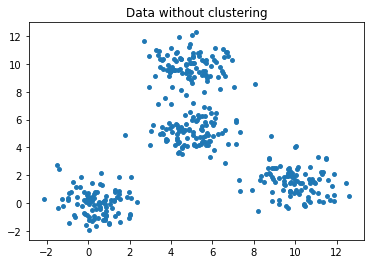

In [3]:
data_x = np.concatenate((x1, x2, x3, x4))
data_y = np.concatenate((y1, y2, y3, y4))

plt.scatter(data_x, data_y, s=15)

plt.title("Data without clustering")
print('Number of Data Points :', np.shape(data_x))

In [4]:
#creating another array with assigned cluster for the data

c = [] #cluster assignment array

"""
Means of the clusters are :-

Cluster-1 : (0.5 0) 
Cluster-2 : (5 5) 
Cluster-3 : (5 10) 
Cluster-4 : (10 1.5)
"""

for i in range(401):
    if i < 100:
        c.append(1)
    if 100 < i and i < 201:
        c.append(2)
    if 200 < i and i < 301:
        c.append(3)
    if 300 < i and i < 401:
        c.append(4)
    
#creating a data frame for this
data_true = pd.DataFrame(data = [data_x, data_y, c])
data_true #to evaluate H-score and accuracy for the model

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.996714,0.361736,1.147689,2.023030,0.265847,0.265863,2.079213,1.267435,0.030526,1.042560,...,9.639034,11.159330,8.918937,10.615936,10.593101,9.690454,10.326133,8.748886,10.924027,9.815098
1,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,0.404051,1.886186,0.174578,0.257550,-0.074446,...,1.929618,1.707688,1.771579,0.223251,0.418943,2.553153,1.460445,2.181501,1.528318,1.529756
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[10.593101257968383, 0.4189434595917376]
[4.400624977046228, 11.90941664047013]
[5.686051459998439, 10.048084946661382]
[5.51503526720866, 6.2776648957884245]


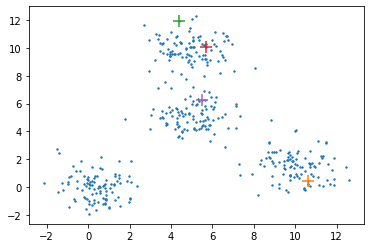

In [5]:
#initialize cluster centers

#selecting random vectors as cluster means and setting the value of seed
np.random.seed(6)

clusterMeans = np.random.randint(400, size=4)

for i in range(4):
    clusterMeans[i] = int(clusterMeans[i])

mu1 = [data_x[clusterMeans[0]], data_y[clusterMeans[0]]]
mu2 = [data_x[clusterMeans[1]], data_y[clusterMeans[1]]]
mu3 = [data_x[clusterMeans[2]], data_y[clusterMeans[2]]]
mu4 = [data_x[clusterMeans[3]], data_y[clusterMeans[3]]]

means = [mu1, mu2, mu3, mu4]

print(mu1)
print(mu2)
print(mu3)
print(mu4)

plt.scatter(data_x, data_y, marker='o', s=2)
plt.scatter(mu1[0], mu1[1], marker='+', s=125)
plt.scatter(mu2[0], mu2[1], marker='+', s=125)
plt.scatter(mu3[0], mu3[1], marker='+', s=125)
plt.scatter(mu4[0], mu4[1], marker='+', s=125)

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

In [6]:
# Cluster assignment and re-estimation Stage

def distance(x1, y1, x2, y2):
    return np.sqrt(np.square(x1 - x2) + np.square(y1 - y2))

def minimum(arr):
    minima = arr[0]
    index = 0
    
    for i in range(len(arr)):
        if minima > arr[i]:
            minima = arr[i]
            index = i
    
    return minima, index

#Using initial/estimated cluster centers (mean  𝜇𝑖 ) perform cluster assignment.
def ClusterAssignment(data_x, data_y, k, mu1, mu2, mu3, mu4):
    #cluster assignment to empty lists
    cluster_x = [[], [], [], []]
    cluster_y = [[], [], [], []]
    cost_function = 0

    #computes clusters according to minimum euclidean distance

    #assigning clusters
    for i in range(k):
        #compute the distances of the data point from each mean vector
        dist1 = distance(data_x[i], data_y[i], mu1[0], mu1[1])
        dist2 = distance(data_x[i], data_y[i], mu2[0], mu2[1])
        dist3 = distance(data_x[i], data_y[i], mu3[0], mu3[1])
        dist4 = distance(data_x[i], data_y[i], mu4[0], mu4[1])

        dist = [dist1, dist2, dist3, dist4]

        #compute minimum distance
        min_value, index = minimum(dist)
        cost_function = cost_function + (min_value)**2

        #assigning the data point to the respective cluster
        cluster_x[index].append(data_x[i])
        cluster_y[index].append(data_y[i])
        
    
    cost_function = cost_function/k
    return cluster_x, cluster_y, cost_function

X1, y1, J1 = ClusterAssignment(data_x, data_y, 400, mu1, mu2, mu3, mu4)

#re-estimation means of the clusters

def NewMeanAssignment(clusterX, clusterY):
    mu1 = [float(np.mean(clusterX[0])), float(np.mean(clusterY[0]))]
    mu2 = [float(np.mean(clusterX[1])), float(np.mean(clusterY[1]))]
    mu3 = [float(np.mean(clusterX[2])), float(np.mean(clusterY[2]))]
    mu4 = [float(np.mean(clusterX[3])), float(np.mean(clusterY[3]))]
    
    return mu1, mu2, mu3, mu4


NewMeanAssignment(X1, y1)

([10.024093863364538, 1.493839428492667],
 [3.9545201933051755, 11.062066203269925],
 [5.1726905019038725, 9.734253303588115],
 [2.767819282269643, 2.6682488946538423])

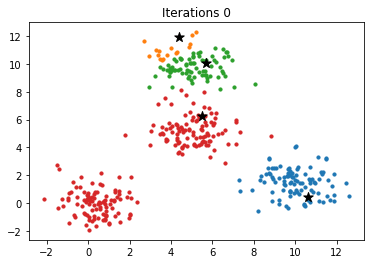

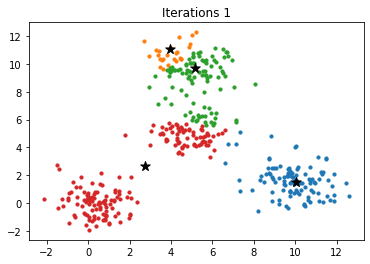

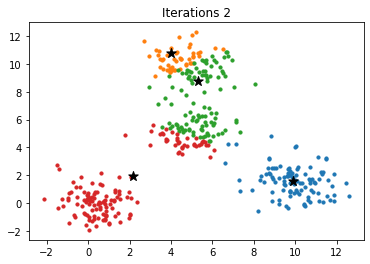

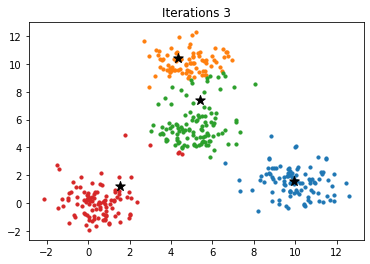

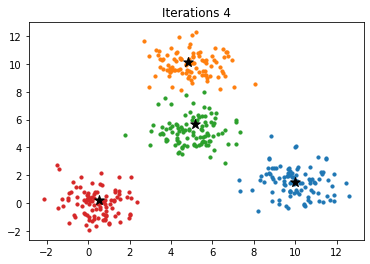

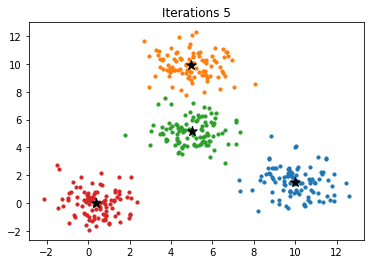

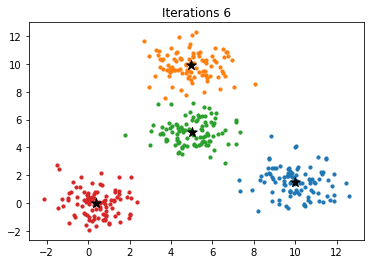

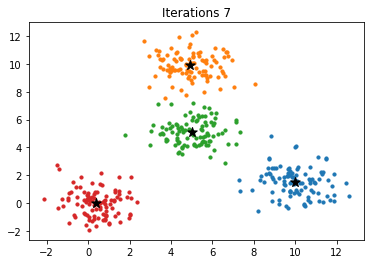

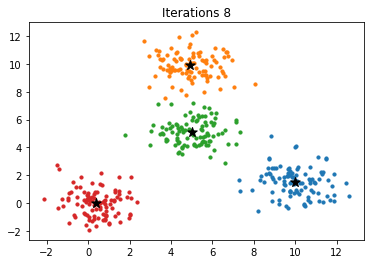

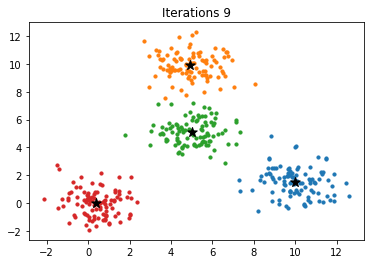

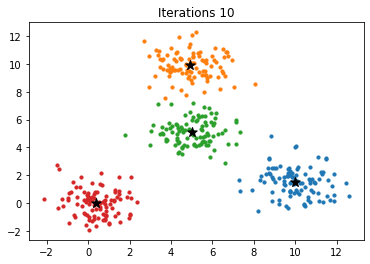

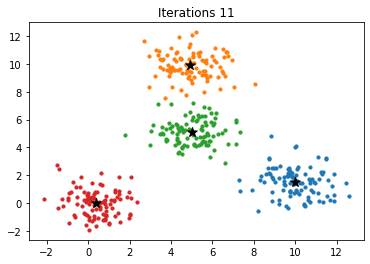

In [7]:
iterations = 12
cost_values = []

for i in range(12):
    X, y, J = ClusterAssignment(data_x, data_y, 400, mu1, mu2, mu3, mu4)
    cost_values.append(J)
    
    #plotting graphs
    title = 'Iterations ' + str(i)
    plt.title(title)
    plt.scatter(X[0], y[0], marker='o', s=10)
    plt.scatter(X[1], y[1], marker='o', s=10)
    plt.scatter(X[2], y[2], marker='o', s=10)
    plt.scatter(X[3], y[3], marker='o', s=10)
    plt.scatter(mu1[0], mu1[1], marker='*', s=100, color='black')
    plt.scatter(mu2[0], mu2[1], marker='*', s=100, color='black')
    plt.scatter(mu3[0], mu3[1], marker='*', s=100, color='black')
    plt.scatter(mu4[0], mu4[1], marker='*', s=100, color='black')
    plt.show()
    
    mu1, mu2, mu3, mu4 = NewMeanAssignment(X, y)

In [8]:
"""
Means of the clusters are :-

Cluster-1 : (0.5 0) -X[3]
Cluster-2 : (5 5) -X[2]
Cluster-3 : (5 10) -X[1]
Cluster-4 : (10 1.5) -X[0]
"""
X = np.array(X)
y = np.array(y)

pred_data_x = np.concatenate((X[3], X[2], X[1], X[0]))
pred_data_y = np.concatenate((y[3], y[2], y[1], y[0]))
assigned_cluster = []

for i in range(len(X[3])):
    assigned_cluster.append(1)
    
for i in range(len(X[2])):
    assigned_cluster.append(2)
    
for i in range(len(X[1])):
    assigned_cluster.append(3)
    
for i in range(len(X[0])):
    assigned_cluster.append(4)

pred_Data = pd.DataFrame(data = [pred_data_x, pred_data_y, assigned_cluster])
pred_Data #to evaluate H-score and accuracy for the model

<ipython-input-8-ee0cb272697f>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
<ipython-input-8-ee0cb272697f>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y)


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.996714,0.361736,1.147689,2.023030,0.265847,0.265863,2.079213,1.267435,0.030526,1.042560,...,9.639034,11.159330,8.918937,10.615936,10.593101,9.690454,10.326133,8.748886,10.924027,9.815098
1,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,0.404051,1.886186,0.174578,0.257550,-0.074446,...,1.929618,1.707688,1.771579,0.223251,0.418943,2.553153,1.460445,2.181501,1.528318,1.529756
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


minimum value of cost function is  1.9158072424086903


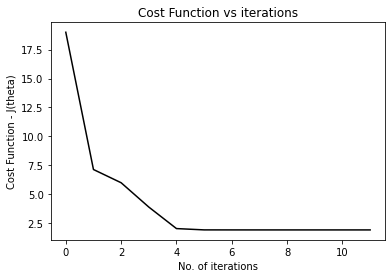

In [9]:
#Cost function plots

plt.title('Cost Function vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost Function - J(theta)')
plt.plot(cost_values, color='black')
print('minimum value of cost function is ', cost_values[-1])

## **Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [10]:
#Homogeneity score

hScore_kmeans = homogeneity_score(c, assigned_cluster)
hScore_kmeans

0.9797836820374377

In [11]:
#Silhouette coeeficient
data_points = [] #creating a (2, 400) dimension based array for data points

for i in range(len(data_x)):
    data_points.append([data_x[i], data_y[i]])

silhouette_score(data_points, assigned_cluster)

0.6679817755406025

# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

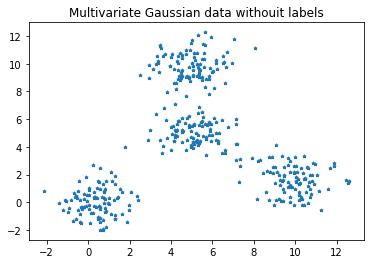

In [12]:
#Generate 2D gaussian data

"""
Means of the clusters are :-

Cluster-1 : (0.5 0)
Cluster-2 : (5 5) 
Cluster-3 : (5 10) 
Cluster-4 : (10 1.5)
"""

#defining the means for data generation

#fixing the random seed
np.random.seed(42)
mu1 = np.array([0.5,0])
mu2 = np.array([5,5])
mu3 = np.array([5,10])
mu4 = np.array([10,1.5])

#defining the covariance matrix
cov_matrix = np.array([[1,0],[0,1]])

d1 = np.random.multivariate_normal(mu1,cov_matrix,100) #100 samples for 1st mean
d2 = np.random.multivariate_normal(mu2,cov_matrix,100) #100 samples for 2nd mean
d3 = np.random.multivariate_normal(mu3,cov_matrix,100) #100 samples for 3rd mean
d4 = np.random.multivariate_normal(mu4,cov_matrix,100) #100 samples for 4th mean

#generating a single array with the data points

data_GMM = np.concatenate((d1,d2,d3,d4))

# plotting the distribution
data_points = np.array(data_GMM)
new = np.hsplit(data_points, 2)

plt.title("Multivariate Gaussian data withouit labels")
plt.scatter(new[0], new[1], marker='*', s=10) #plotting the distribution

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [13]:
def initialization(data,K):
    
    """
    data - given dataset
    k - number of clusters
    """
    
    #extraction of number of data points from the given dataset
    n = np.shape(data_GMM)[1] 
    
    #fixing the random seed
    np.random.seed(42)
    
    #mean initialization
    mean_index = np.random.randint(0,data.shape[0],K)
    means = data[mean_index,:]
    means = np.transpose(means) #taking transpose of an numpy array

    #covariance matrix initialization
    Co_variance=np.zeros((n,n,K))
    for i in range(K):
        Co_variance[:,:,i] = np.eye(n)*np.max(data)  #identitiy * max data  

    #initializing the weights matrix
    weights = np.ones((K,1))/K #defining uniformly distributed weights for initialization

    theta = [means, Co_variance, weights] #return the parameters

    return theta

In [14]:
Theta = initialization(data_GMM, 4)
Theta

[array([[ 3.62233063, 10.32613302,  5.83569211,  5.95400176],
        [ 4.06217496,  0.24888642,  8.87029315,  5.65139125]]),
 array([[[12.5733598, 12.5733598, 12.5733598, 12.5733598],
         [ 0.       ,  0.       ,  0.       ,  0.       ]],
 
        [[ 0.       ,  0.       ,  0.       ,  0.       ],
         [12.5733598, 12.5733598, 12.5733598, 12.5733598]]]),
 array([[0.25],
        [0.25],
        [0.25],
        [0.25]])]

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [15]:
# Expectation stage GMM

def E_Step_GMM(data,K,theta):
    
    """
    takes data, number of clusters and the paramter vector as inputs
    returns the aposteriori probabilities, new parameter vectors
    """
    #extracting the dimenstions from the data
    dim = len(data)
    
    #extracting means, covariance, weights from theta vector
    means = theta[0]
    Co_variance = theta[1]
    weights = theta[2]
    
    #Computing weight coefficients of each point for each distribution.
    responsibility = np.zeros((dim,K)) #initalize to zero vector
    
    for i in range(K):
        iterations = 0   #set the iterations to zero
        
        for points in data:
            #initialize the denominator to 0
            normalising = 0
            
            # Compute probability i-th cluster 
            normal_distribution = scipy.stats.multivariate_normal.pdf(points, mean = means[:,i], cov = Co_variance[:,:,i])
            
            #caluclate the weight of each distribution for each cluster
            responsibility[iterations][i] = weights[i]*normal_distribution #this is the numerator term

            for j in range(K):
                #add a very small bias term so that the denominator cannot be zero
                bias = 10**(-10)
                
                #update the denominator for all the clusters
                normalising += weights[j]*(scipy.stats.multivariate_normal.pdf(points ,mean=means[:,j], cov=Co_variance[:,:,j]) + bias)

            responsibility[iterations][i] = responsibility[iterations][i]/normalising
            iterations+=1

    return responsibility

In [16]:
responsibility_matrix = E_Step_GMM(data_GMM, 4, Theta)

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [17]:
dummy = np.array([[1],[2],[3]])
print(dummy)
print(np.transpose(dummy))

[[1]
 [2]
 [3]]
[[1 2 3]]


In [18]:
# Maximization stage

def M_Step_GMM(data,responsibility):
    
    '''
    takes data and responsibility matrix as inputs
    returns new values of theta (paramters) and the log likelihood value, which is to be maximized in this case.
    '''
    
    #extraction of number of data points N and number of clusters from the responsibility matrix, and number of dimensions of data
    
    N = np.shape(responsibility)[0] #data points
    K = np.shape(responsibility)[1] #no of clusters
    d = np.shape(data)[1] #number of dimensions in one data point
    
    #converting the data into numpy array
    data = np.array(data)
    
    #finding the Nk value which is the responsibility summed over for each cluster
    N_k = np.sum(responsibility, axis=0) #summing over the horizontal axis
    
    #Computing the new means
    new_means = np.zeros((K,d)) 
    
    for i in range(K):
        mu1 = data
        mu2 = responsibility[:,i]
        mean_vector= mu1*mu2[:,None]
        
        #dividing with the N_k value after summing over the product over all clusters
        new_means[i]=(1/N_k[i])*np.sum(mean_vector,axis=0) #summing over the horizontal axis
        
    #converting means into horizontal vector
    new_means = np.transpose(new_means)
    
    #Compute Covariance
    Sigma = np.zeros((d,d,K))   #initialize covariance matrix 
    
    for i in range(K):
        
        for j in range(N):
            
            #implement the vector products
            norm = data[j,:] - new_means[:,i]  #(x- mu)*(x - mu)'
            product = np.outer(norm,np.transpose(norm)) #multiply with responsibility matrix for each cluster
            numerator = responsibility[j,i]*product
            Sigma[:,:,i] += numerator
            
        Sigma[:,:,i] = (1/N_k[i])*Sigma[:,:,i] #update for each cluster
        
    #Compute Proportions
    weights = N_k/N

    
    new_theta = [new_means,Sigma,weights]
    
    #defining the likelihood function which should be maximized in order to get the optima
    
    product_prob = 0 #initialize the inner sum for each cluster
    Log_likelihood_function = 0 #intialize the sum for the whole data points
    
    for n in range(N):
        
        for k in range(K):
            
            #multiply weights with the aposterori probability and sum them over each cluster
            product_prob += weights[k]*(scipy.stats.multivariate_normal.pdf(data[n,:],mean=new_means[:,k], cov=Sigma[:,:,k]))
        
        Log_likelihood_function += np.log(product_prob)
           
    return new_theta, Log_likelihood_function

In [19]:
M_Step_GMM(data_GMM, responsibility_matrix)

([array([[2.81790947, 9.07669723, 5.13164801, 5.16665526],
         [2.50309836, 1.64595625, 7.98791793, 4.88787075]]),
  array([[[ 9.79107685,  7.33172364,  3.01214925,  8.73669193],
          [ 5.87719125, -0.31633245, -0.38611349,  0.98412754]],
  
         [[ 5.87719125, -0.31633245, -0.38611349,  0.98412754],
          [11.57603885,  2.46404692,  9.52717462, 13.08578239]]]),
  array([0.33898284, 0.18793758, 0.21490544, 0.2581741 ])],
 -26.245873623462234)

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-20-bbf6324f909b>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

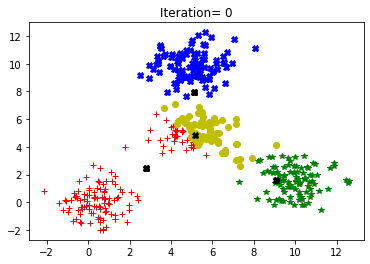

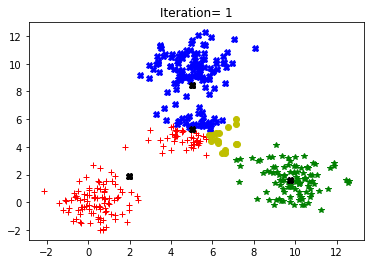

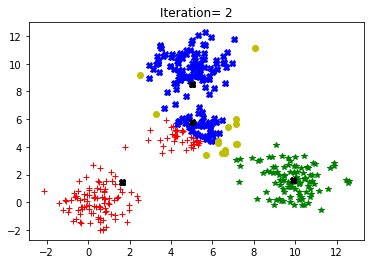

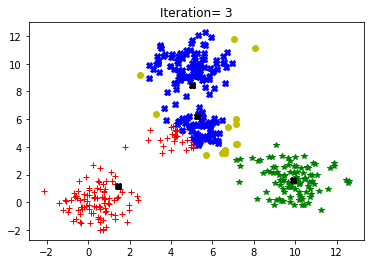

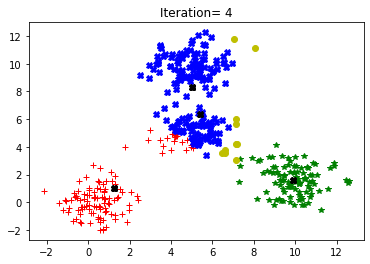

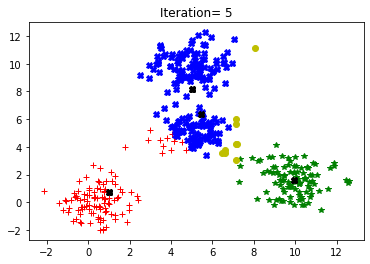

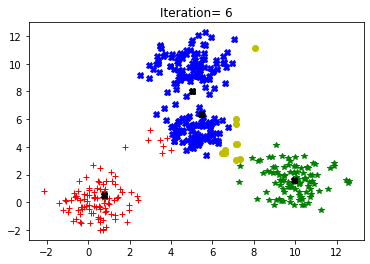

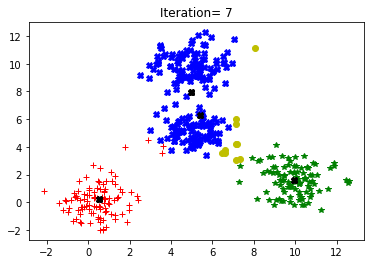

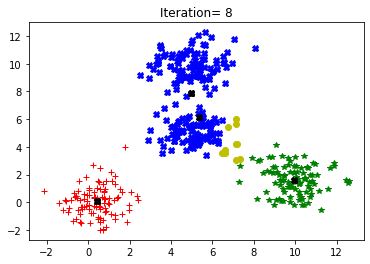

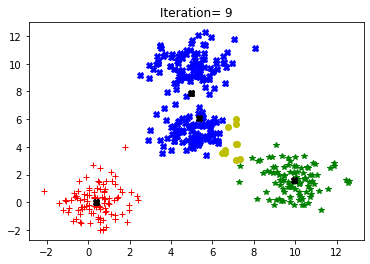

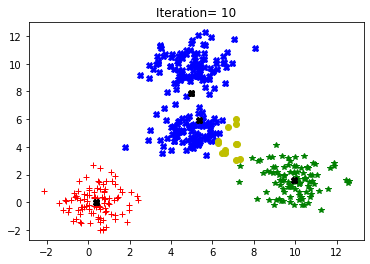

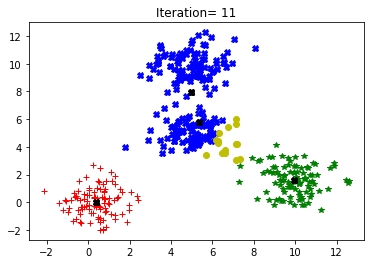

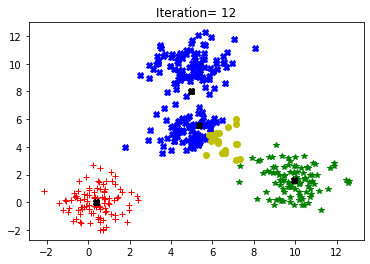

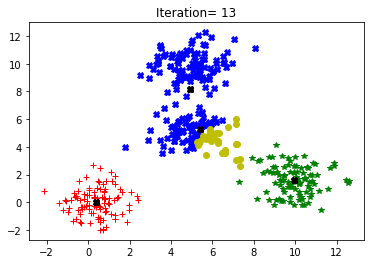

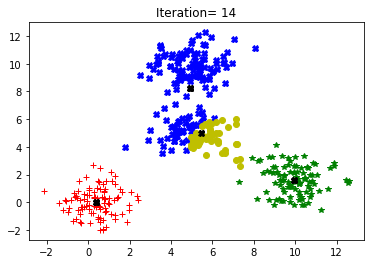

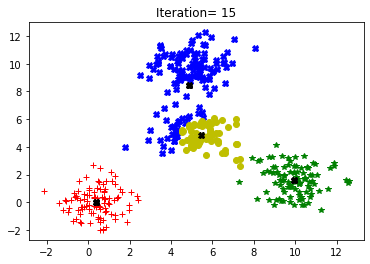

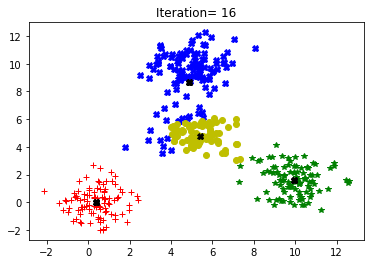

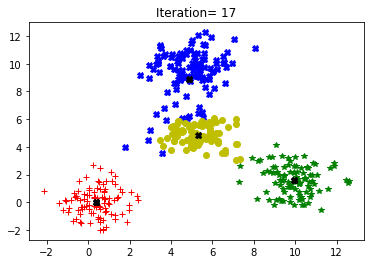

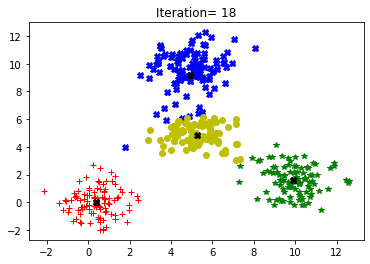

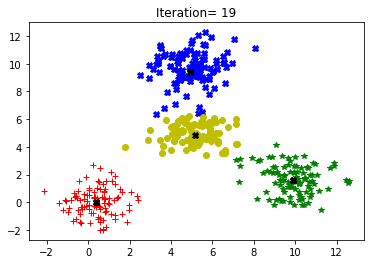

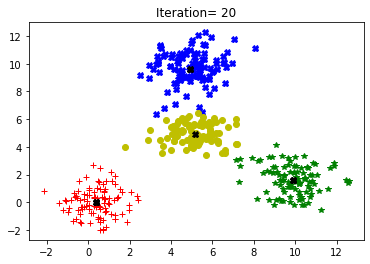

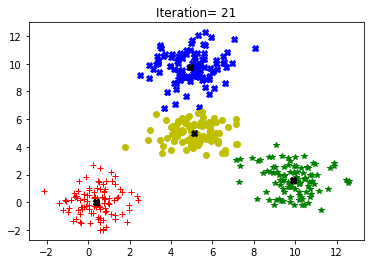

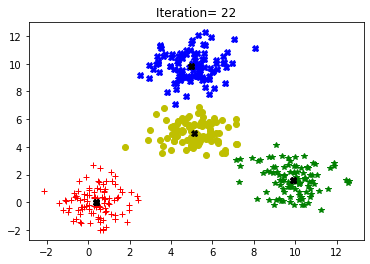

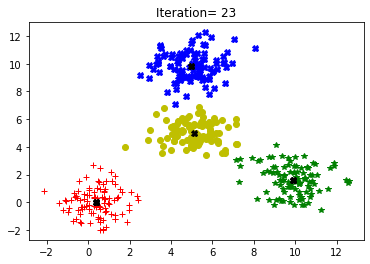

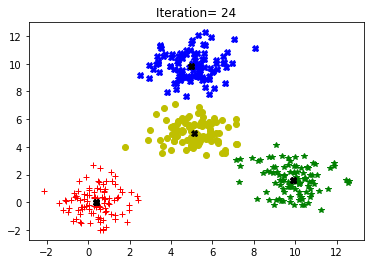

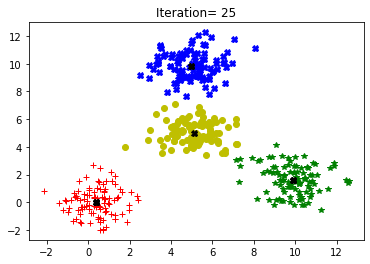

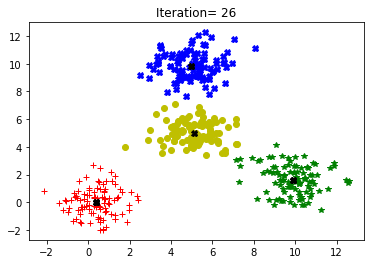

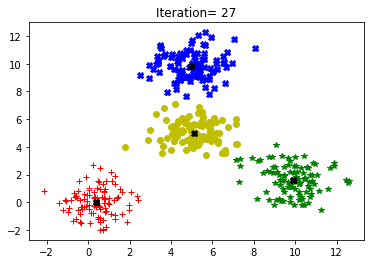

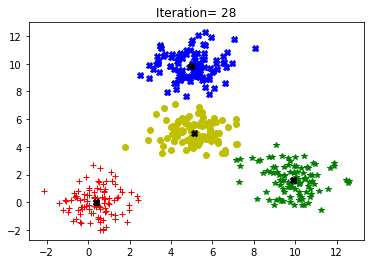

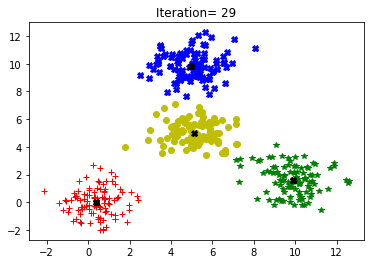

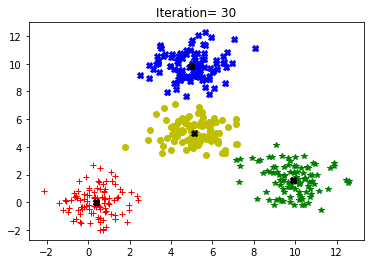

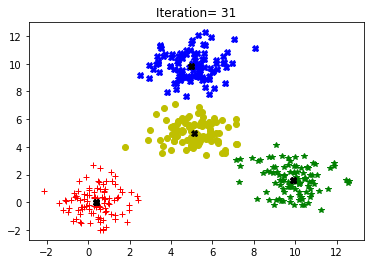

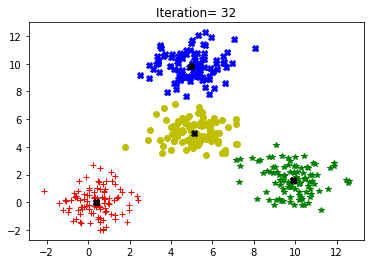

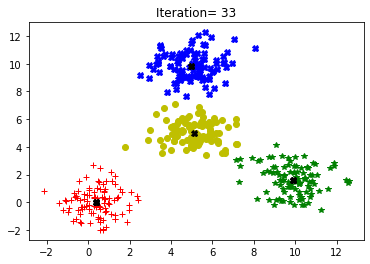

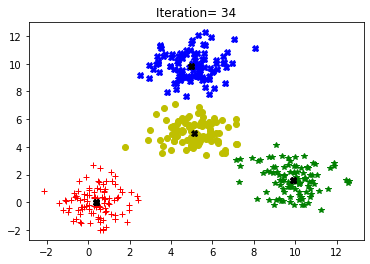

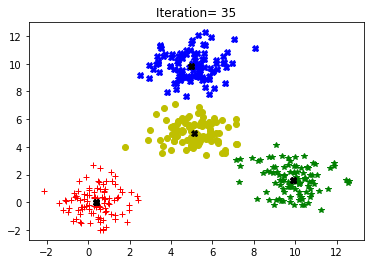

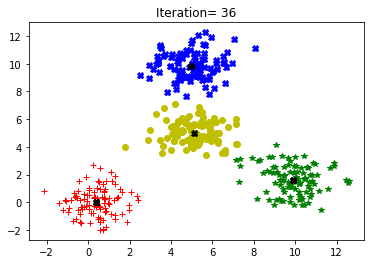

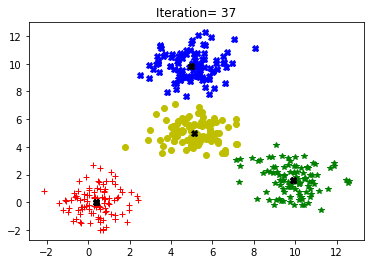

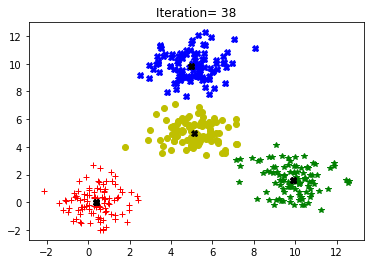

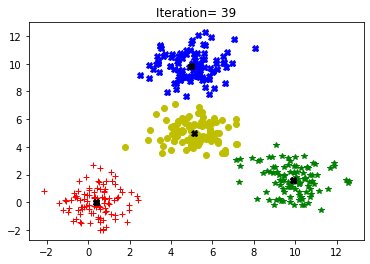

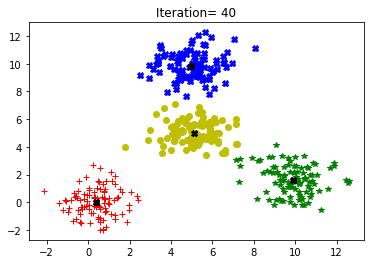

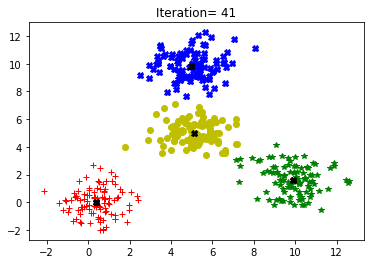

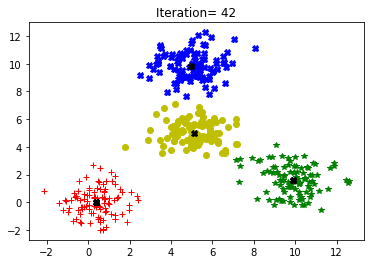

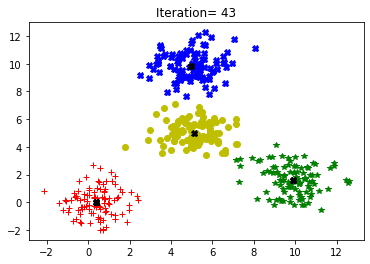

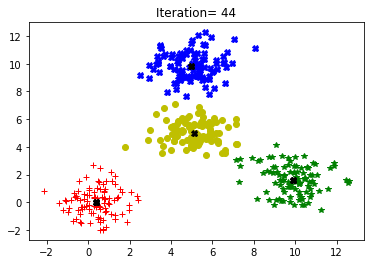

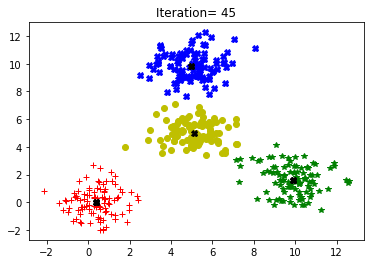

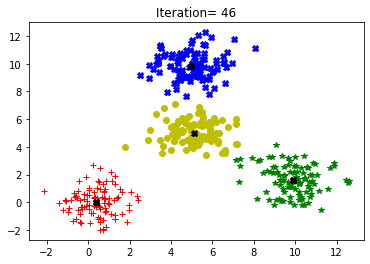

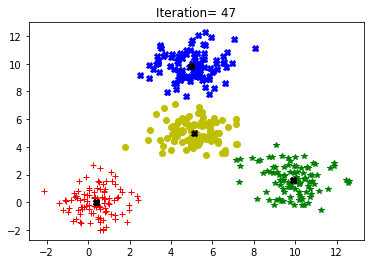

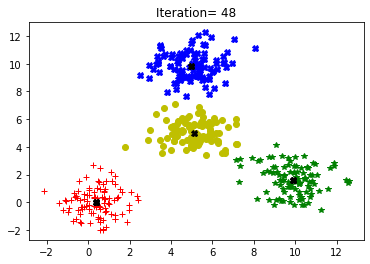

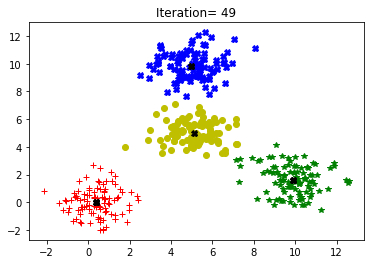

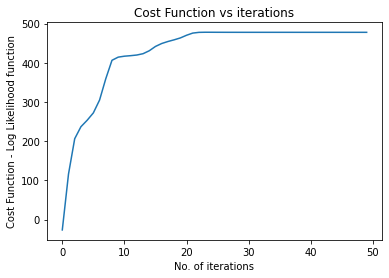

In [20]:
log_l = []
Itr = 50
eps = 10**(-14)  # for threshold
clr = ['r','g','b','y','k','m','c']
mrk = ['+','*','X','o','.','<','p']

#data conversion to numpy array
data = np.array(data_GMM)

K = 4   # no. of clusters

theta = initialization(data_GMM,K)

for n in range(Itr):
    responsibility = E_Step_GMM(data_GMM,K,theta)
    cluster_label = np.argmax(responsibility,axis=1) #Label Points
    theta,log_likhd = M_Step_GMM(data_GMM,responsibility)
    log_l.append(log_likhd)
    plt.figure()

    for l in range(K):
        id=np.where(cluster_label == l)
        plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])

        Cents = theta[0].T
        plt.plot(Cents[:,0],Cents[:,1],'X',color = 'k')
        plt.title('Iteration= %d' % (n))

    #teriminate loop if the likelihood function reaches saturation
    if n>2:
        if abs(log_l[n]-log_l[n-1])<eps:
            break


plt.figure()
plt.title('Cost Function vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost Function - Log Likelihood function')
plt.plot(log_l)

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [21]:
# homogenity score

true_label = []
for i in range(401):
    if i < 100:
        true_label.append(1)
    if 100 < i and i < 201:
        true_label.append(2)
    if 200 < i and i < 301:
        true_label.append(3)
    if 300 < i and i < 401:
        true_label.append(4)
        
hScore_gmm = homogeneity_score(true_label, cluster_label)
print(hScore_gmm)

0.972130616644902


In [22]:
# silhoutte coefficient

silhouette_score(data_GMM, cluster_label)

0.6775496965356197

# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

In [23]:
# write your code here

print('GMM h score - ', hScore_gmm)

print('KMeans h score - ',hScore_kmeans)

GMM h score -  0.972130616644902
KMeans h score -  0.9797836820374377


# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [24]:
## write your code here

data_iris = pd.read_csv('IRIS.csv')
data_iris['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [25]:
feature = data_iris[['sepal_length','sepal_width','petal_length','petal_width']]
target = data_iris[['species']].apply(lambda x:pd.Categorical(x).codes)

target.describe()

,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [26]:
#creating numpy arrays for k-means and GMM distribution

featureVector = feature.to_numpy()
targetVector = target.to_numpy()

targetVector = targetVector.T

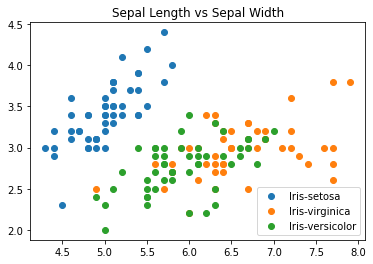

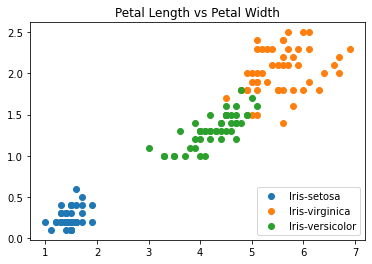

In [27]:
#Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)
data1 = data_iris[data_iris['species'] == 'Iris-setosa']
data2 = data_iris[data_iris['species'] == 'Iris-virginica']
data3 = data_iris[data_iris['species'] == 'Iris-versicolor']

#plotting the figure-1
plt.title('Sepal Length vs Sepal Width')

plt.scatter(data1['sepal_length'], data1['sepal_width'])
plt.scatter(data2['sepal_length'], data2['sepal_width'])
plt.scatter(data3['sepal_length'], data3['sepal_width'])

# Function add a legend  
plt.legend(["Iris-setosa", "Iris-virginica", "Iris-versicolor"], loc ="lower right")
plt.show()

#plotting the figure-2
plt.title('Petal Length vs Petal Width')

plt.scatter(data1['petal_length'], data1['petal_width'])
plt.scatter(data2['petal_length'], data2['petal_width'])
plt.scatter(data3['petal_length'], data3['petal_width'])

# Function add a legend  
plt.legend(["Iris-setosa", "Iris-virginica", "Iris-versicolor"], loc ="lower right")
plt.show()

[6.0, 3.0]
[4.9, 2.5]
[7.2, 3.6]


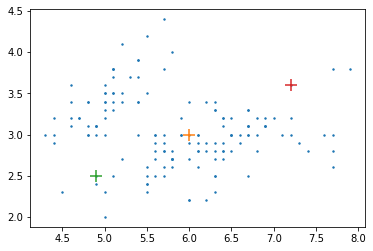

In [28]:
#initialize cluster centers
#for sepal_length and sepal_width

data_x = data_iris['sepal_length']
data_y = data_iris['sepal_width']

#selecting random vectors as cluster means and setting the value of seed
np.random.seed(6)

clusterMeans = np.random.randint(150, size=3)

for i in range(3):
    clusterMeans[i] = int(clusterMeans[i])

mu1 = [data_x[clusterMeans[0]], data_y[clusterMeans[0]]]
mu2 = [data_x[clusterMeans[1]], data_y[clusterMeans[1]]]
mu3 = [data_x[clusterMeans[2]], data_y[clusterMeans[2]]]

means = [mu1, mu2, mu3]

print(mu1)
print(mu2)
print(mu3)


plt.scatter(data_x, data_y, marker='o', s=2)
plt.scatter(mu1[0], mu1[1], marker='+', s=125)
plt.scatter(mu2[0], mu2[1], marker='+', s=125)
plt.scatter(mu3[0], mu3[1], marker='+', s=125)

In [29]:
# Cluster assignment and re-estimation Stage

def distance(x1, y1, x2, y2):
    return np.sqrt(np.square(x1 - x2) + np.square(y1 - y2))

def minimum(arr):
    minima = arr[0]
    index = 0
    
    for i in range(len(arr)):
        if minima > arr[i]:
            minima = arr[i]
            index = i
    
    return minima, index

#Using initial/estimated cluster centers (mean  𝜇𝑖 ) perform cluster assignment.
def ClusterAssignment(data_x, data_y, k, mu1, mu2, mu3):
    #cluster assignment to empty lists
    cluster_x = [[], [], [], []]
    cluster_y = [[], [], [], []]
    cost_function = 0

    #computes clusters according to minimum euclidean distance

    #assigning clusters
    for i in range(k):
        #compute the distances of the data point from each mean vector
        dist1 = distance(data_x[i], data_y[i], mu1[0], mu1[1])
        dist2 = distance(data_x[i], data_y[i], mu2[0], mu2[1])
        dist3 = distance(data_x[i], data_y[i], mu3[0], mu3[1])

        dist = [dist1, dist2, dist3]

        #compute minimum distance
        min_value, index = minimum(dist)
        cost_function = cost_function + (min_value)**2

        #assigning the data point to the respective cluster
        cluster_x[index].append(data_x[i])
        cluster_y[index].append(data_y[i])
        
    
    cost_function = cost_function/k
    return cluster_x, cluster_y, cost_function

X1, y1, J1 = ClusterAssignment(data_x, data_y, 150, mu1, mu2, mu3)

#re-estimation means of the clusters

def NewMeanAssignment(clusterX, clusterY):
    mu1 = [float(np.mean(clusterX[0])), float(np.mean(clusterY[0]))]
    mu2 = [float(np.mean(clusterX[1])), float(np.mean(clusterY[1]))]
    mu3 = [float(np.mean(clusterX[2])), float(np.mean(clusterY[2]))]
    
    return mu1, mu2, mu3


NewMeanAssignment(X1, y1)

([5.948192771084337, 3.0518072289156626],
 [4.916279069767442, 3.011627906976744],
 [7.141666666666668, 3.1374999999999997])

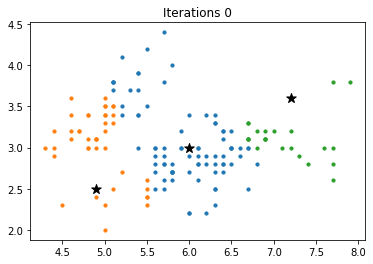

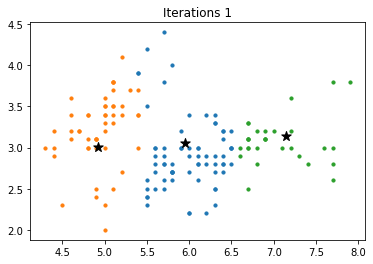

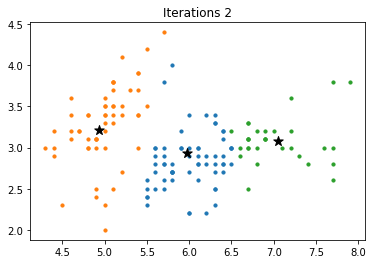

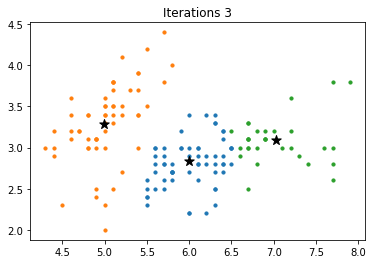

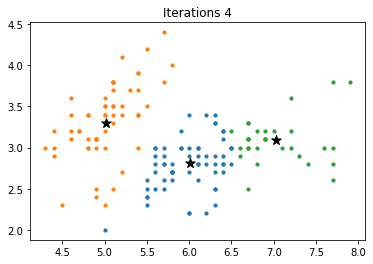

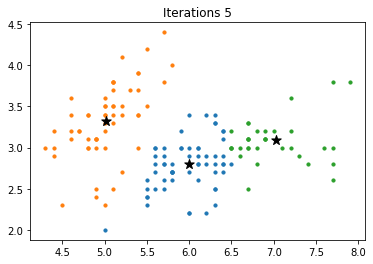

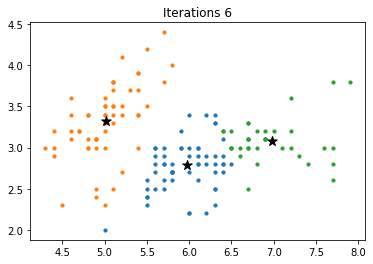

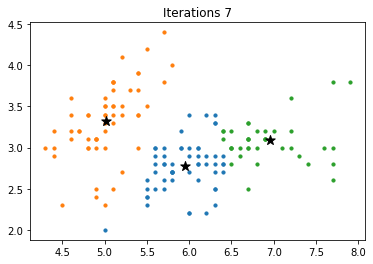

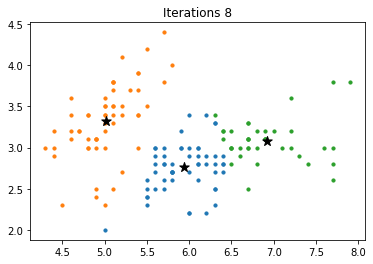

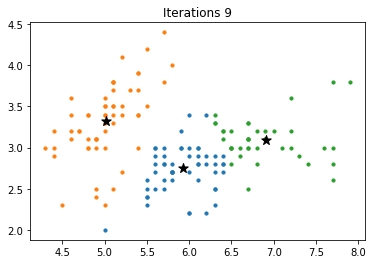

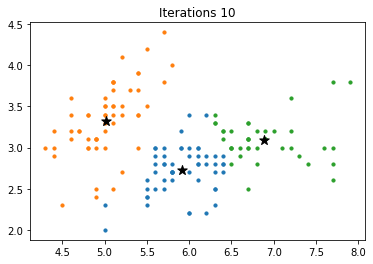

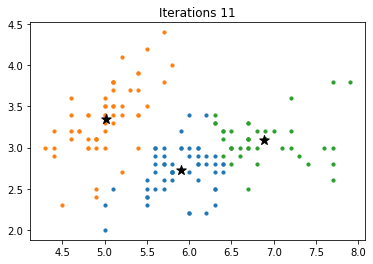

In [30]:
iterations = 12
cost_values = []

for i in range(12):
    X, y, J = ClusterAssignment(data_x, data_y, 150, mu1, mu2, mu3)
    cost_values.append(J)
    
    #plotting graphs
    title = 'Iterations ' + str(i)
    plt.title(title)
    plt.scatter(X[0], y[0], marker='o', s=10)
    plt.scatter(X[1], y[1], marker='o', s=10)
    plt.scatter(X[2], y[2], marker='o', s=10)
    plt.scatter(mu1[0], mu1[1], marker='*', s=100, color='black')
    plt.scatter(mu2[0], mu2[1], marker='*', s=100, color='black')
    plt.scatter(mu3[0], mu3[1], marker='*', s=100, color='black')
    plt.show()
    
    mu1, mu2, mu3 = NewMeanAssignment(X, y)

minimum value of cost function is  0.2496975971940364


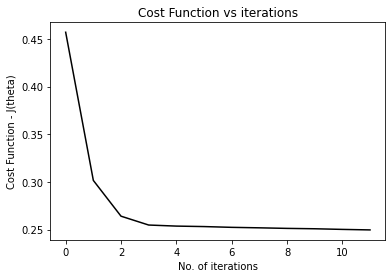

In [31]:
#cost function plots

plt.title('Cost Function vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost Function - J(theta)')
plt.plot(cost_values, color='black')
print('minimum value of cost function is ', cost_values[-1])

In [32]:
"""
Means of the clusters are :-

Cluster-1 : (0.5 0) -X[3]
Cluster-2 : (5 5) -X[2]
Cluster-3 : (5 10) -X[1]
Cluster-4 : (10 1.5) -X[0]
"""
X = np.array(X)
y = np.array(y)

pred_data_x = np.concatenate((X[0], X[1], X[2]))
pred_data_y = np.concatenate((y[0], y[1], y[2]))
assigned_cluster = []

for i in range(len(X[0])):
    assigned_cluster.append(0)
    
for i in range(len(X[1])):
    assigned_cluster.append(1)
    
for i in range(len(X[2])):
    assigned_cluster.append(2)

pred_Data = pd.DataFrame(data = [pred_data_x, pred_data_y, assigned_cluster])
pred_Data #to evaluate H-score and accuracy for the model

<ipython-input-32-a54cc65403c0>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
<ipython-input-32-a54cc65403c0>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y)


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,5.5,5.7,5.0,5.9,6.0,6.1,5.6,5.6,5.8,6.2,...,7.7,6.3,6.4,6.9,6.7,6.9,6.8,6.7,6.7,6.5
1,2.3,2.8,2.0,3.0,2.2,2.9,2.9,3.0,2.7,2.2,...,3.0,3.4,3.1,3.1,3.1,3.1,3.2,3.3,3.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [33]:
#homogeneity score

targetVector = np.array(targetVector)
assigned_cluster = np.array(assigned_cluster)

print('Homogenity Score -', homogeneity_score(targetVector[0], assigned_cluster))

print('Confusion Matrix -\n',sm.metrics.confusion_matrix(targetVector[0], assigned_cluster))

Homogenity Score - 0.7760149288828957
Confusion Matrix -
 [[50  0  0]
 [ 4 46  0]
 [ 0  8 42]]


In [34]:
#scikit learn tool to perform K-means Clustering and explaining the results using a Confusion matrix

kmeans = KMeans(n_clusters=3,n_init=100,max_iter=100,verbose=1)
kmeans.fit(featureVector)

Initialization complete
Iteration 0, inertia 107.65000000000003
Iteration 1, inertia 85.65611602954202
Iteration 2, inertia 84.35467300347221
Iteration 3, inertia 83.47963263888894
Iteration 4, inertia 82.09358738904196
Iteration 5, inertia 81.17033414092332
Iteration 6, inertia 79.96297983461304
Iteration 7, inertia 79.43376414532673
Iteration 8, inertia 79.01070972222224
Iteration 9, inertia 78.94506582597728
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 102.46000000000001
Iteration 1, inertia 84.15229446479024
Iteration 2, inertia 83.47963263888894
Iteration 3, inertia 82.09358738904196
Iteration 4, inertia 81.17033414092332
Iteration 5, inertia 79.96297983461304
Iteration 6, inertia 79.43376414532673
Iteration 7, inertia 79.01070972222224
Iteration 8, inertia 78.94506582597728
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 180.74000000000012
Iteration 1, inertia 83.34831944444447
Iteration 2, i

Initialization complete
Iteration 0, inertia 131.00999999999996
Iteration 1, inertia 84.58133138509842
Iteration 2, inertia 83.66851394574323
Iteration 3, inertia 82.81641093072982
Iteration 4, inertia 81.6330027847179
Iteration 5, inertia 80.89577599999998
Iteration 6, inertia 79.96297983461304
Iteration 7, inertia 79.43376414532673
Iteration 8, inertia 79.01070972222224
Iteration 9, inertia 78.94506582597728
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 111.07000000000004
Iteration 1, inertia 82.33137226813592
Iteration 2, inertia 81.17033414092332
Iteration 3, inertia 79.96297983461304
Iteration 4, inertia 79.43376414532673
Iteration 5, inertia 79.01070972222224
Iteration 6, inertia 78.94506582597728
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 183.09999999999997
Iteration 1, inertia 85.68672625339293
Iteration 2, inertia 84.35467300347221
Iteration 3, inertia 83.47963263888894
Iteration 4, in

KMeans(max_iter=100, n_clusters=3, n_init=100, verbose=1)

In [35]:
#finding the accuracy and metrics to evaluate the Kmeans model

predictions_iris_model = kmeans.predict(featureVector)
print('performance=',homogeneity_score(predictions_iris_model,targetVector[0]))

performance= 0.7649861514489815


C:\Users\PRANAY KAMAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


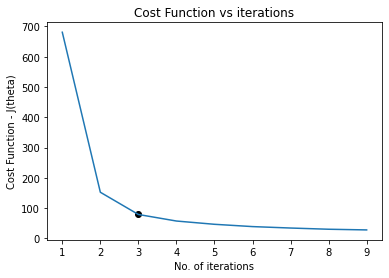

By elbow method, we can say that optimal number of clusters is 3


In [36]:
#Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters
#finding the optimal number of clusters in the data

points = []

for i in range(1,10):
    
    #run K-means model for different number of clusters
    k_model = KMeans(n_clusters=i)
    k_model.fit(featureVector)
    points.append(k_model.inertia_)
    
#plotting
plt.figure()
plt.title('Cost Function vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost Function - J(theta)')
plt.plot(np.arange(1, 10, 1), points)
plt.scatter(3, 80, color='black')
plt.show()
print('By elbow method, we can say that optimal number of clusters is 3')

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-37-4693f89feba9>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

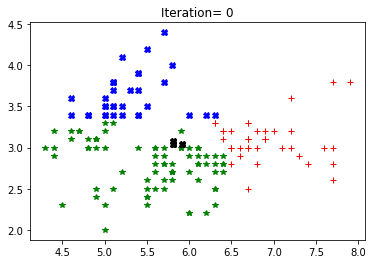

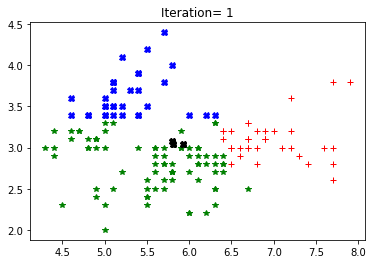

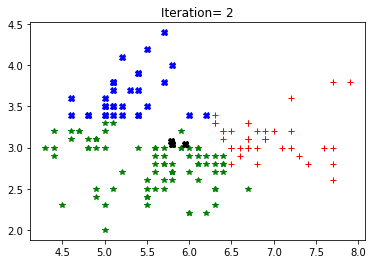

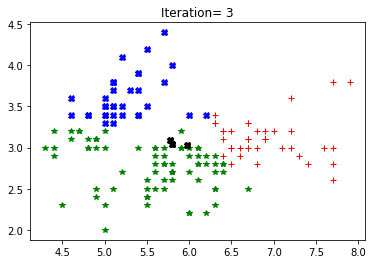

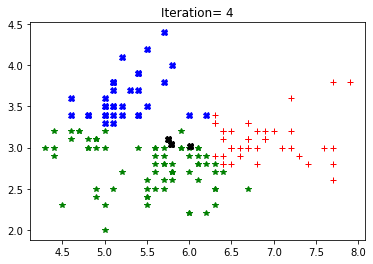

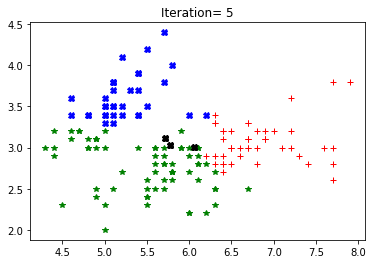

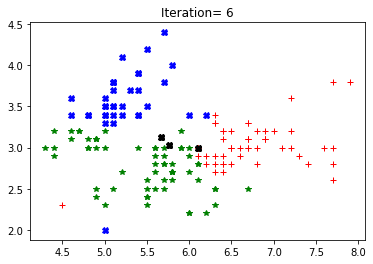

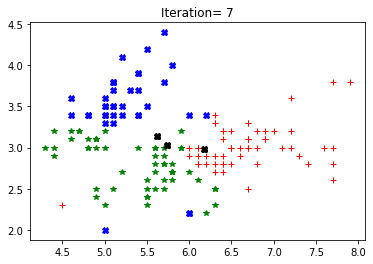

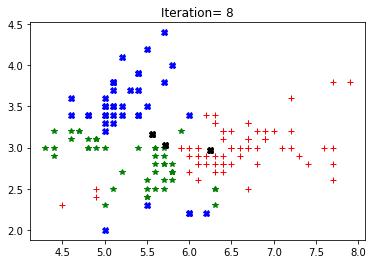

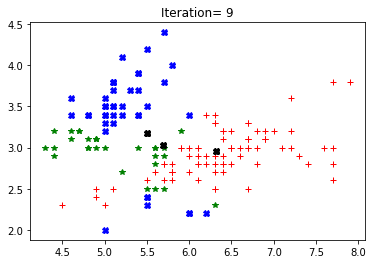

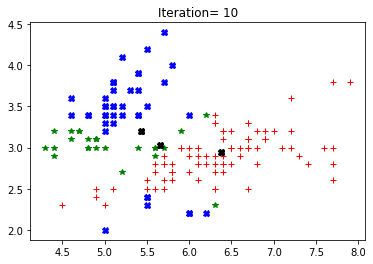

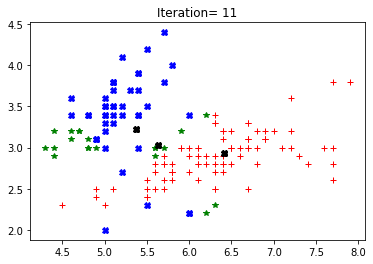

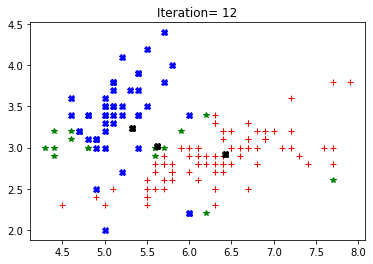

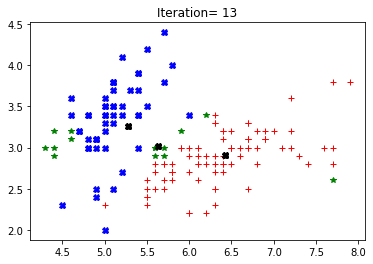

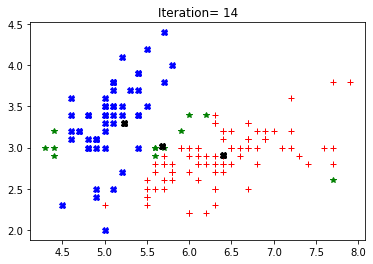

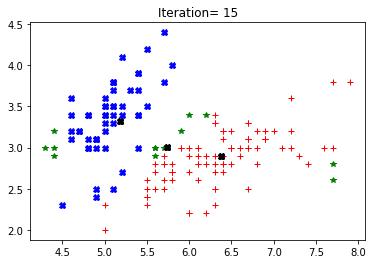

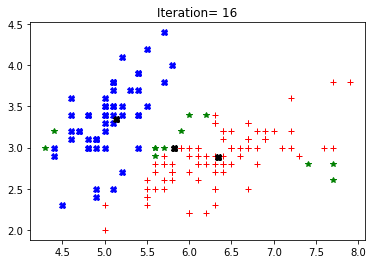

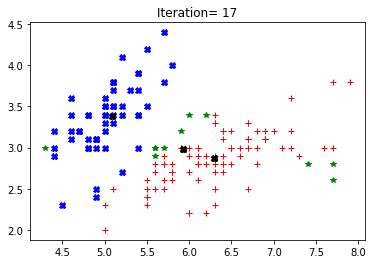

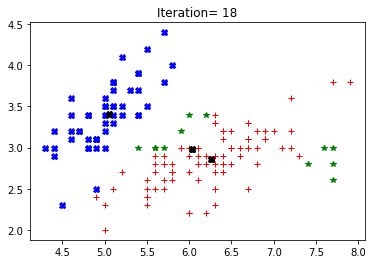

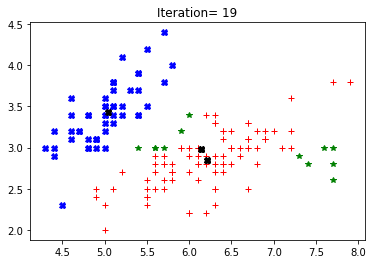

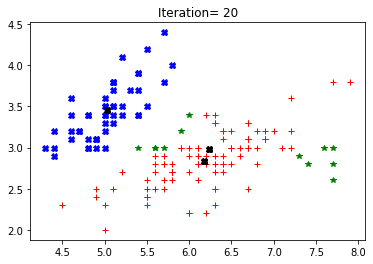

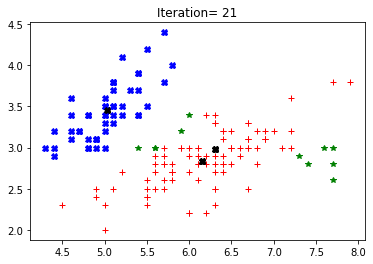

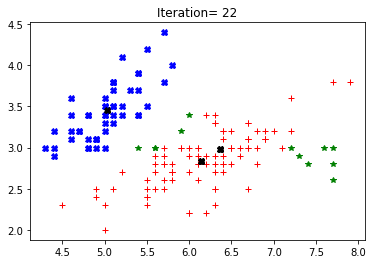

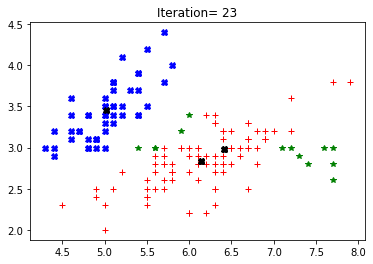

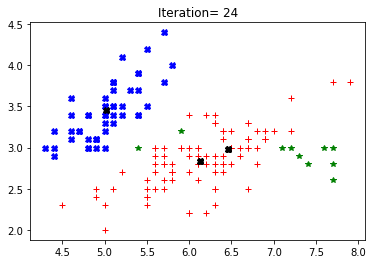

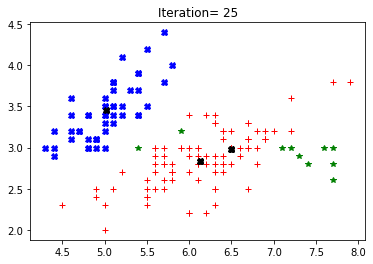

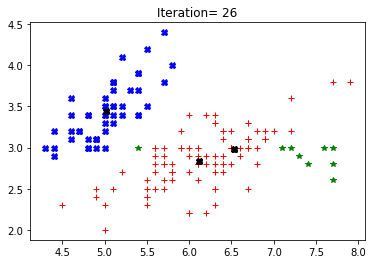

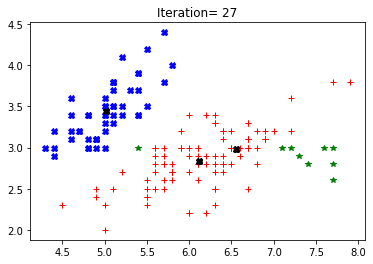

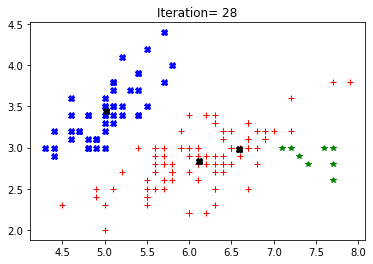

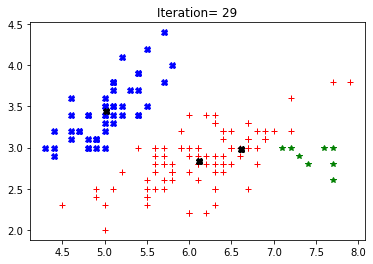

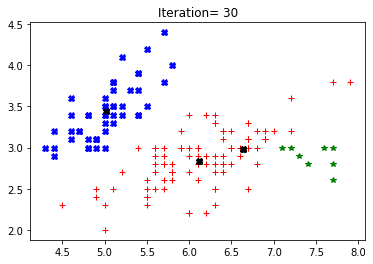

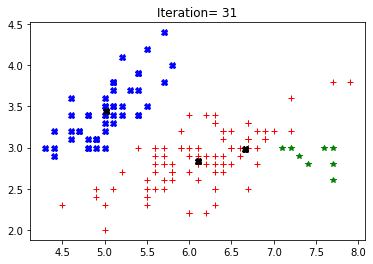

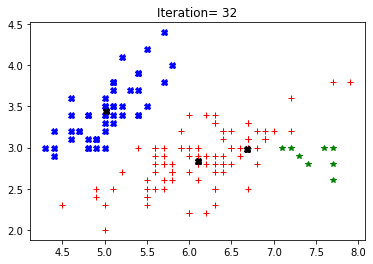

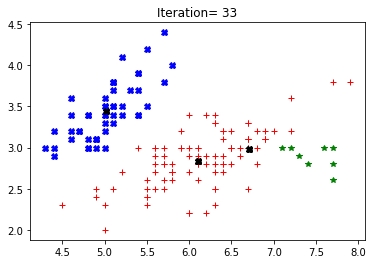

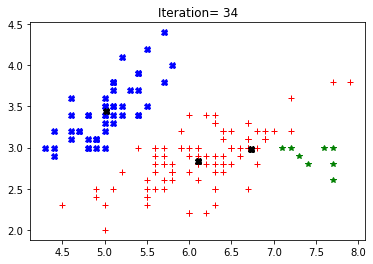

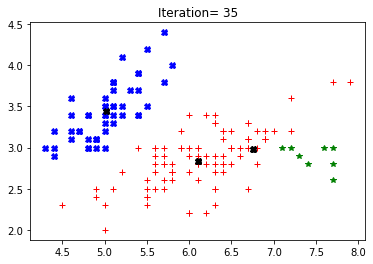

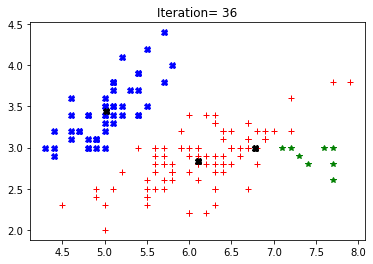

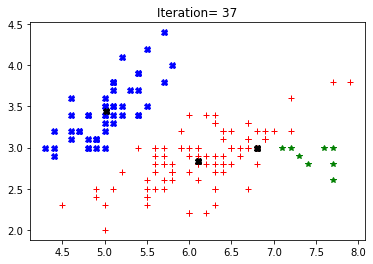

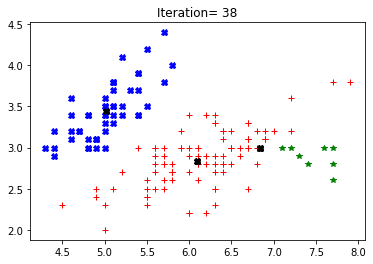

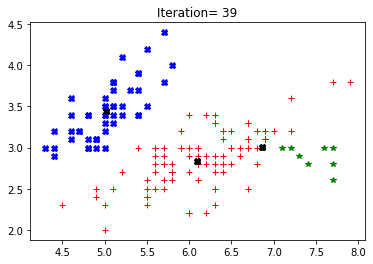

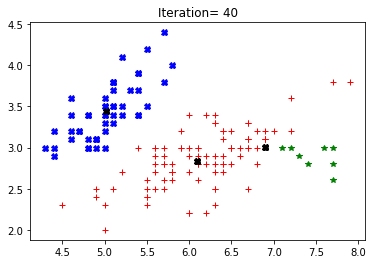

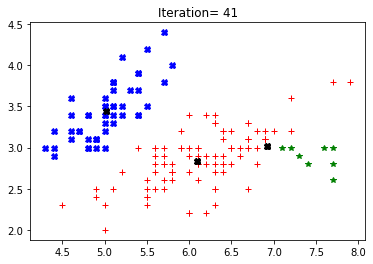

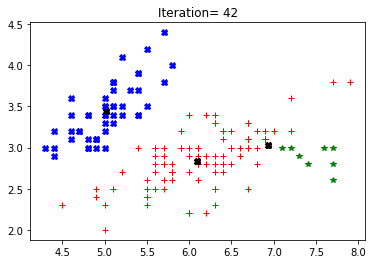

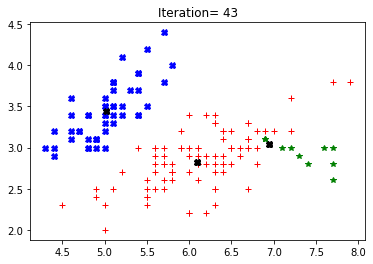

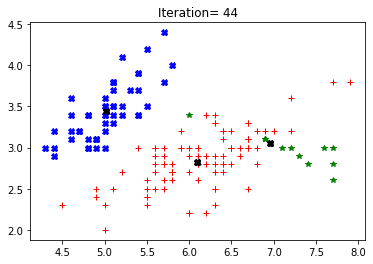

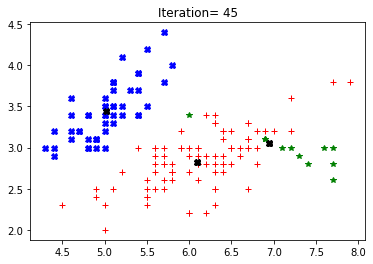

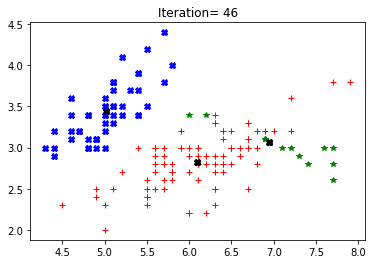

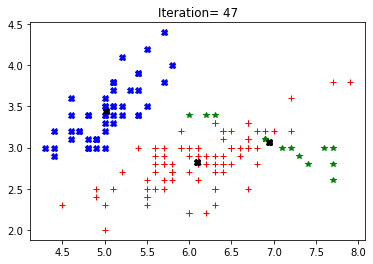

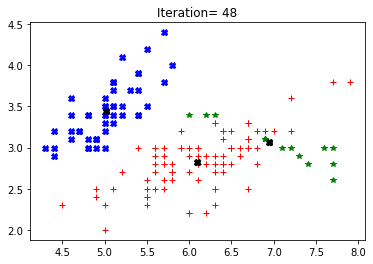

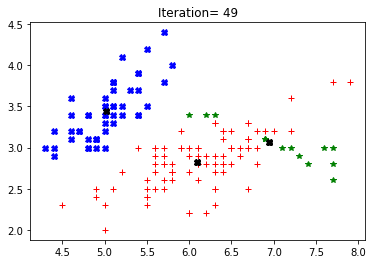

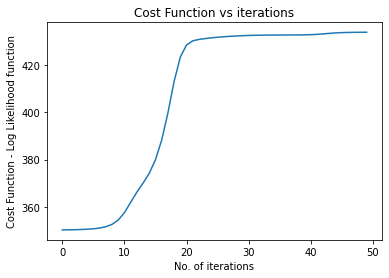

In [37]:
# GMM based clustering of IRIS dataset
#for sepal_length and sepal_width

log_l = []
Itr = 50
eps = 10**(-14)  # for threshold
clr = ['r','g','b','y','k','m','c']
mrk = ['+','*','X','o','.','<','p']

#data conversion to numpy array
data = np.array(featureVector[:, :2])

K = 3

theta = initialization(data,K)

for n in range(Itr):
    responsibility = E_Step_GMM(data,K,theta)
    cluster_label_sepal = np.argmax(responsibility,axis=1) #Label Points
    theta,log_likhd = M_Step_GMM(data,responsibility)
    log_l.append(log_likhd)
    plt.figure()

    for l in range(K):
        id=np.where(cluster_label_sepal == l)
        plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])

        Cents = theta[0].T
        plt.plot(Cents[:,0],Cents[:,1],'X',color = 'k')
        plt.title('Iteration= %d' % (n))

    #teriminate loop if the likelihood function reaches saturation
    if n>2:
        if abs(log_l[n]-log_l[n-1])<eps:
            break


plt.figure()
plt.title('Cost Function vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost Function - Log Likelihood function')
plt.plot(log_l)

<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])
<ipython-input-38-646a513447bd>:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(da

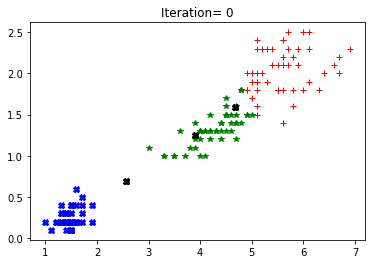

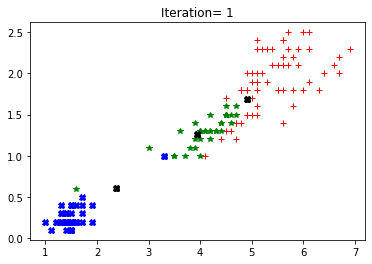

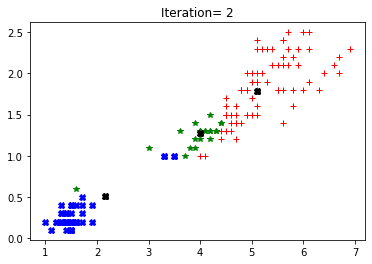

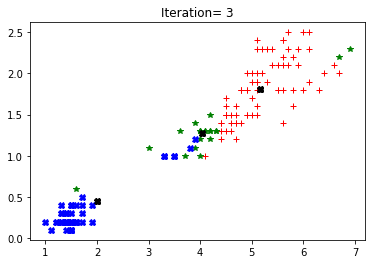

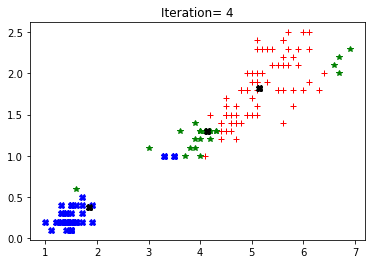

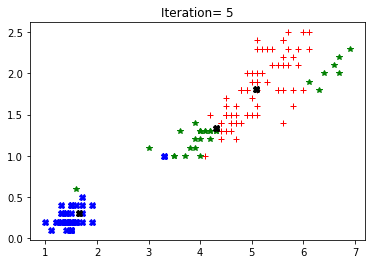

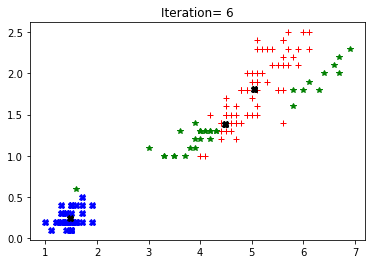

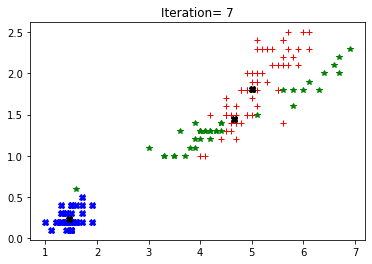

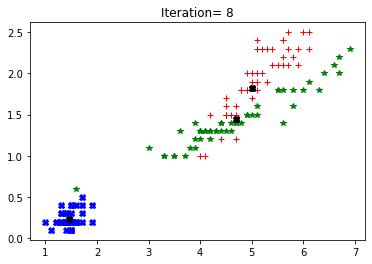

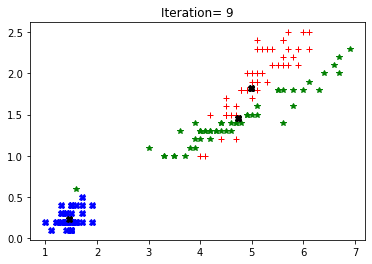

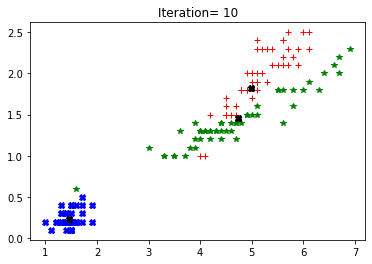

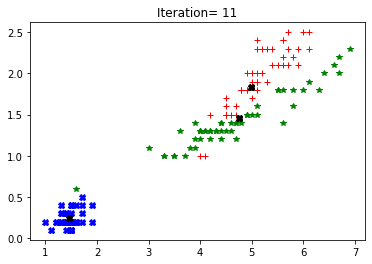

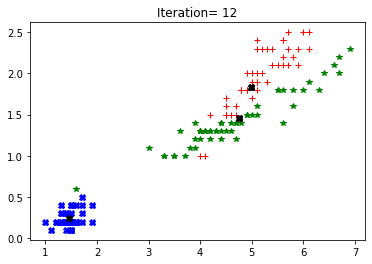

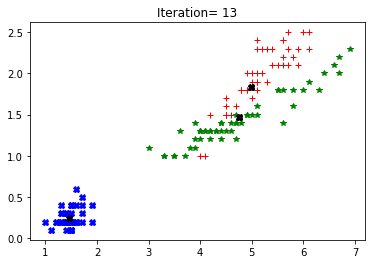

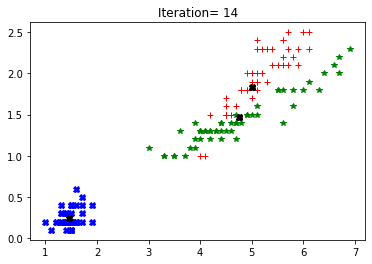

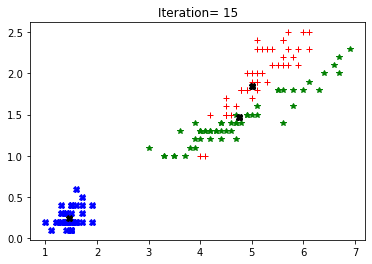

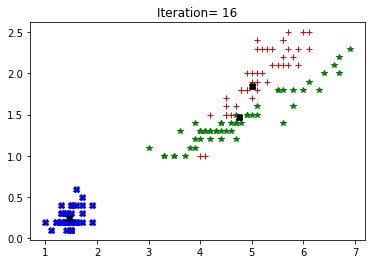

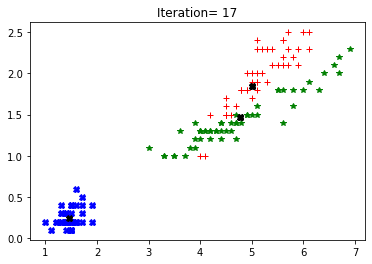

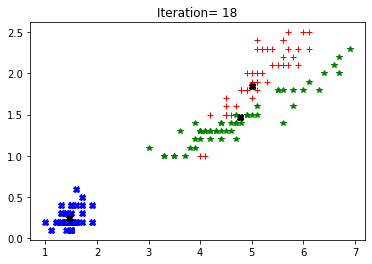

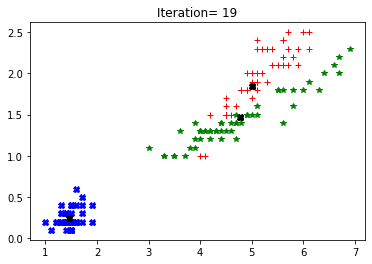

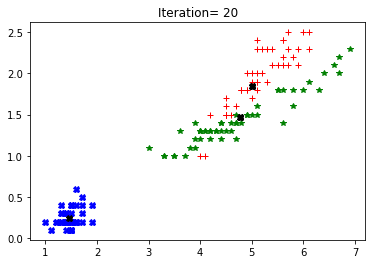

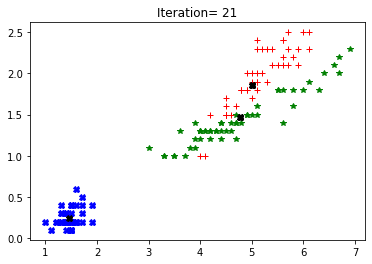

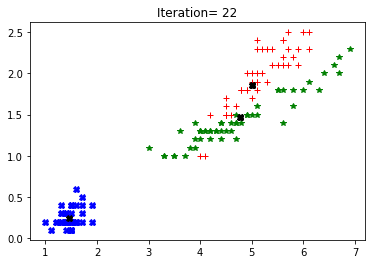

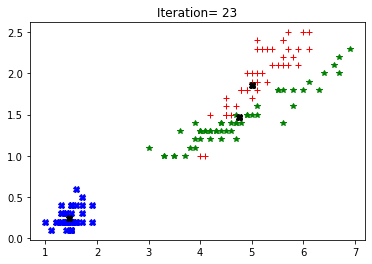

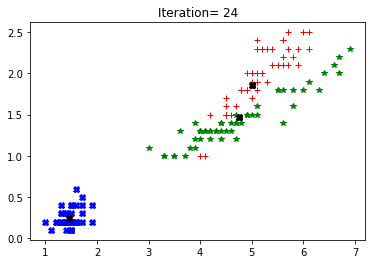

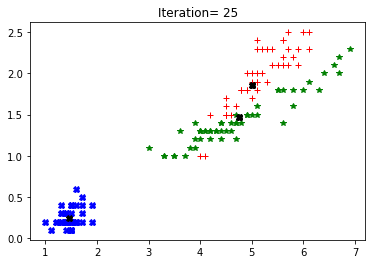

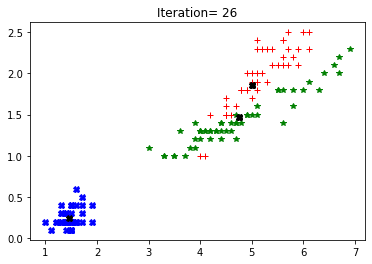

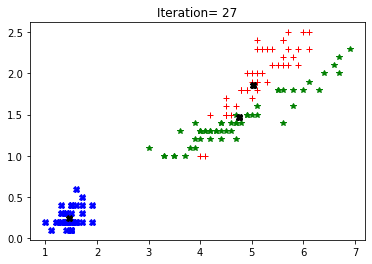

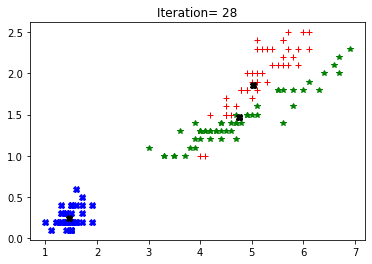

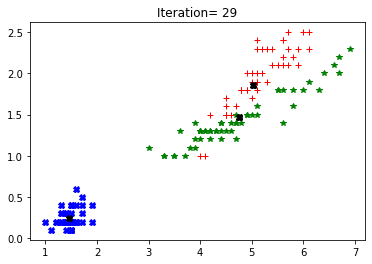

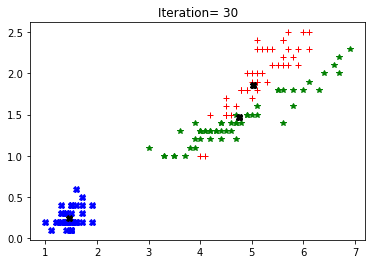

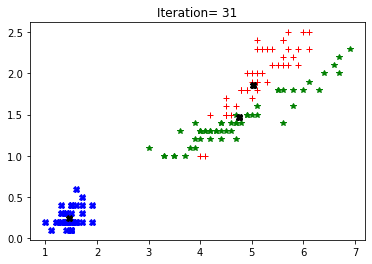

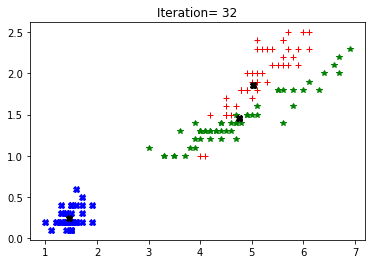

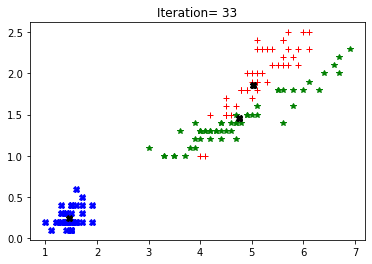

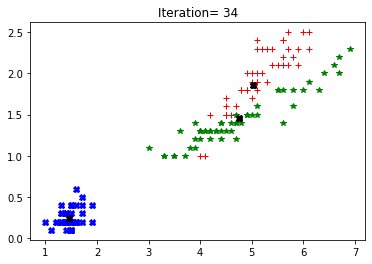

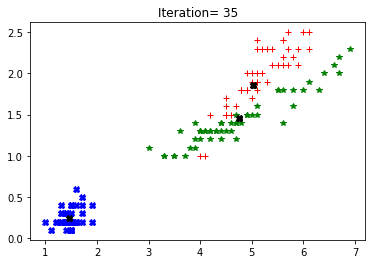

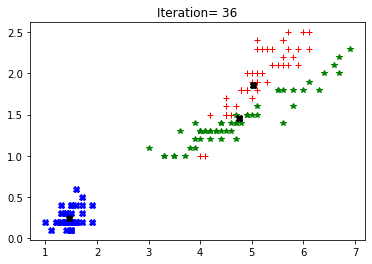

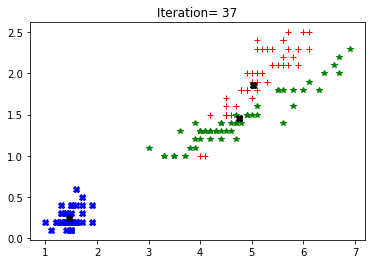

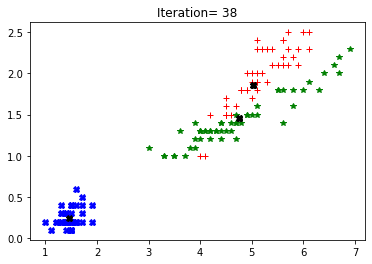

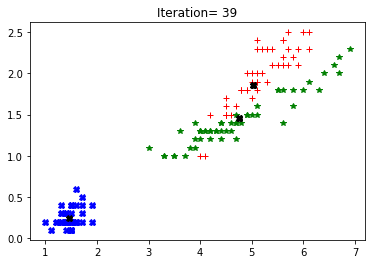

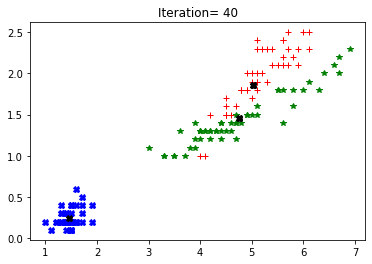

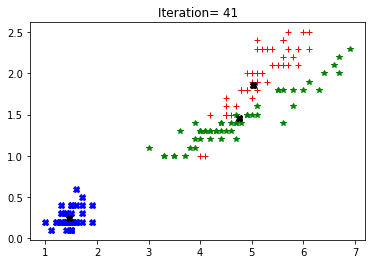

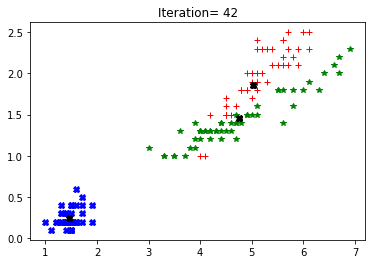

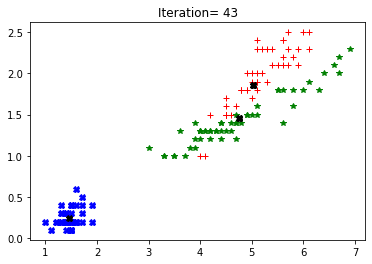

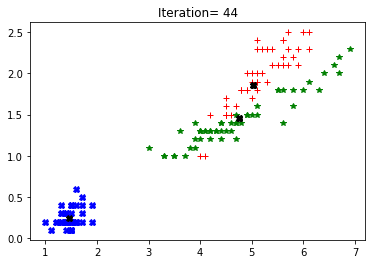

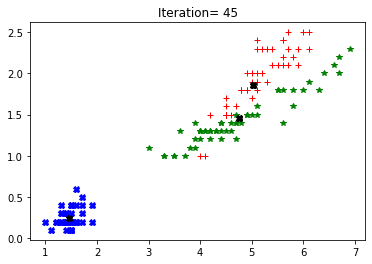

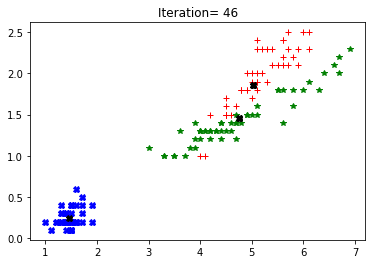

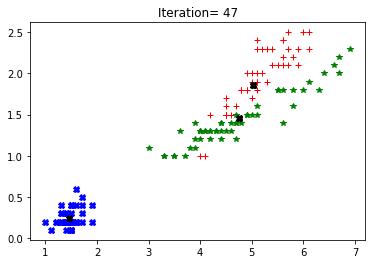

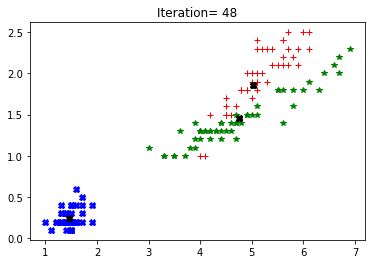

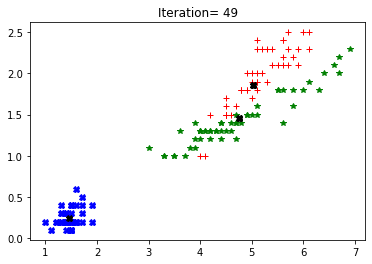

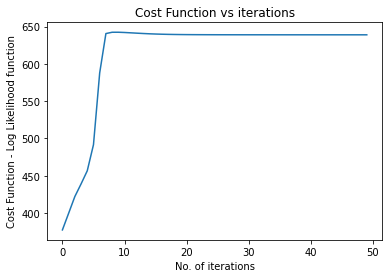

In [38]:
# GMM based clustering of IRIS dataset
#for petal_length and petal_width

log_l = []
Itr = 50
eps = 10**(-14)  # for threshold
clr = ['r','g','b','y','k','m','c']
mrk = ['+','*','X','o','.','<','p']

#data conversion to numpy array
data = np.array(featureVector[:, 2:])

K =   3 # no. of clusters

theta = initialization(data,K)

for n in range(Itr):
    responsibility = E_Step_GMM(data,K,theta)
    cluster_label_petal = np.argmax(responsibility,axis=1) #Label Points
    theta,log_likhd = M_Step_GMM(data,responsibility)
    log_l.append(log_likhd)
    plt.figure()

    for l in range(K):
        id = np.where(cluster_label_petal == l)
        plt.plot(data[id,0],data[id,1],'.',color = clr[l],marker = mrk[l])

        Cents = theta[0].T
        plt.plot(Cents[:,0],Cents[:,1],'X',color = 'k')
        plt.title('Iteration= %d' % (n))

    #teriminate loop if the likelihood function reaches saturation
    if n>2:
        if abs(log_l[n]-log_l[n-1])<eps:
            break


plt.figure() 
plt.title('Cost Function vs iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost Function - Log Likelihood function')
plt.plot(log_l)

In [39]:
#for sepal data set
true_values = np.array(targetVector[0])
cluster_label_sepal
h1 = homogeneity_score(true_values, cluster_label_sepal)
print('Homogenity score - ', homogeneity_score(true_values, cluster_label_sepal))

print('Confusion matrix for sepals data set is \n', sm.metrics.confusion_matrix(true_values, cluster_label_sepal))

#for petal data set
true_values = np.array(targetVector[0])
cluster_label_petal
h2 = homogeneity_score(true_values, cluster_label_petal)
print('Homogenity score -', homogeneity_score(true_values, cluster_label_petal))

print("Homogenlity score for the whole data set is ", (h1+h2)/2)

print('Confusion matrix for petals data set is \n', sm.metrics.confusion_matrix(true_values, cluster_label_petal))

Homogenity score -  0.5738277406251158
Confusion matrix for sepals data set is 
 [[ 1  0 49]
 [48  2  0]
 [38 12  0]]
Homogenity score - 0.6348337048370528
Homogenlity score for the whole data set is  0.6043307227310843
Confusion matrix for petals data set is 
 [[ 0  0 50]
 [13 37  0]
 [34 16  0]]


In [40]:
#GMM Clustering and compare the performance against the true labels obtained by the target vector

from sklearn.mixture import GaussianMixture as Gmm
model_gaussian = Gmm(n_components=3, init_params='kmeans',covariance_type='diag',verbose=1)

#fit the model
model_gaussian.fit(featureVector)

#predict the clusters
predict_gmm = model_gaussian.predict(featureVector)

Initialization 0
Initialization converged: True


In [41]:
print('Homogenity score -', homogeneity_score(targetVector[0], predict_gmm))

print('Confusion matrix for petals data set is \n', sm.metrics.confusion_matrix(targetVector[0], predict_gmm))

Homogenity score - 0.7695955651465263
Confusion matrix for petals data set is 
 [[ 0 50  0]
 [49  0  1]
 [14  0 36]]
